## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0225216	total: 58.8ms	remaining: 58.7s
1:	learn: 1.0047312	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9854151	total: 61ms	remaining: 20.3s
3:	learn: 0.9681522	total: 62.2ms	remaining: 15.5s
4:	learn: 0.9482066	total: 63.2ms	remaining: 12.6s
5:	learn: 0.9299384	total: 64.2ms	remaining: 10.6s
6:	learn: 0.9131789	total: 65.1ms	remaining: 9.24s
7:	learn: 0.8961642	total: 66.1ms	remaining: 8.2s
8:	learn: 0.8799587	total: 67ms	remaining: 7.38s
9:	learn: 0.8627363	total: 68ms	remaining: 6.73s
10:	learn: 0.8486832	total: 69ms	remaining: 6.2s
11:	learn: 0.8328132	total: 70ms	remaining: 5.76s
12:	learn: 0.8172031	total: 70.9ms	remaining: 5.38s
13:	learn: 0.8015084	total: 71.9ms	remaining: 5.06s
14:	learn: 0.7870225	total: 72.8ms	remaining: 4.78s
15:	learn: 0.7745289	total: 73.8ms	remaining: 4.54s
16:	learn: 0.7610661	total: 74.8ms	remaining: 4.33s
17:	learn: 0.7475321	total: 75.7ms	remaining: 4.13s
18:	learn: 0.7345804	total: 76.6ms	remaining: 3.96s
19:	

58:	learn: 0.4307057	total: 109ms	remaining: 1.74s
59:	learn: 0.4257568	total: 110ms	remaining: 1.73s
60:	learn: 0.4217817	total: 111ms	remaining: 1.71s
61:	learn: 0.4187891	total: 112ms	remaining: 1.69s
62:	learn: 0.4159641	total: 113ms	remaining: 1.68s
63:	learn: 0.4119544	total: 114ms	remaining: 1.66s
64:	learn: 0.4082733	total: 115ms	remaining: 1.65s
65:	learn: 0.4053063	total: 116ms	remaining: 1.64s
66:	learn: 0.4013301	total: 117ms	remaining: 1.62s
67:	learn: 0.3989484	total: 117ms	remaining: 1.61s
68:	learn: 0.3953220	total: 118ms	remaining: 1.6s
69:	learn: 0.3926292	total: 119ms	remaining: 1.59s
70:	learn: 0.3889208	total: 120ms	remaining: 1.57s
71:	learn: 0.3853910	total: 121ms	remaining: 1.56s
72:	learn: 0.3827452	total: 122ms	remaining: 1.55s
73:	learn: 0.3796760	total: 123ms	remaining: 1.54s
74:	learn: 0.3760838	total: 124ms	remaining: 1.53s
75:	learn: 0.3723664	total: 125ms	remaining: 1.52s
76:	learn: 0.3684887	total: 126ms	remaining: 1.51s
77:	learn: 0.3660290	total: 127m

149:	learn: 0.2588639	total: 192ms	remaining: 1.09s
150:	learn: 0.2577710	total: 193ms	remaining: 1.08s
151:	learn: 0.2571931	total: 194ms	remaining: 1.08s
152:	learn: 0.2562328	total: 195ms	remaining: 1.08s
153:	learn: 0.2556530	total: 196ms	remaining: 1.07s
154:	learn: 0.2544095	total: 197ms	remaining: 1.07s
155:	learn: 0.2534222	total: 197ms	remaining: 1.07s
156:	learn: 0.2528423	total: 198ms	remaining: 1.06s
157:	learn: 0.2520501	total: 199ms	remaining: 1.06s
158:	learn: 0.2512006	total: 200ms	remaining: 1.06s
159:	learn: 0.2507053	total: 201ms	remaining: 1.05s
160:	learn: 0.2501450	total: 202ms	remaining: 1.05s
161:	learn: 0.2488794	total: 203ms	remaining: 1.05s
162:	learn: 0.2483592	total: 204ms	remaining: 1.05s
163:	learn: 0.2477510	total: 205ms	remaining: 1.04s
164:	learn: 0.2470706	total: 206ms	remaining: 1.04s
165:	learn: 0.2464358	total: 207ms	remaining: 1.04s
166:	learn: 0.2458775	total: 208ms	remaining: 1.04s
167:	learn: 0.2451242	total: 209ms	remaining: 1.03s
168:	learn: 

271:	learn: 0.1872363	total: 300ms	remaining: 802ms
272:	learn: 0.1868297	total: 300ms	remaining: 800ms
273:	learn: 0.1862720	total: 302ms	remaining: 801ms
274:	learn: 0.1858387	total: 303ms	remaining: 799ms
275:	learn: 0.1853365	total: 304ms	remaining: 797ms
276:	learn: 0.1849643	total: 305ms	remaining: 796ms
277:	learn: 0.1845329	total: 306ms	remaining: 794ms
278:	learn: 0.1839244	total: 307ms	remaining: 792ms
279:	learn: 0.1836387	total: 307ms	remaining: 791ms
280:	learn: 0.1833284	total: 308ms	remaining: 789ms
281:	learn: 0.1830563	total: 309ms	remaining: 787ms
282:	learn: 0.1825898	total: 310ms	remaining: 786ms
283:	learn: 0.1820186	total: 311ms	remaining: 784ms
284:	learn: 0.1817169	total: 312ms	remaining: 783ms
285:	learn: 0.1813537	total: 313ms	remaining: 782ms
286:	learn: 0.1810537	total: 314ms	remaining: 780ms
287:	learn: 0.1806636	total: 315ms	remaining: 778ms
288:	learn: 0.1801860	total: 316ms	remaining: 777ms
289:	learn: 0.1797158	total: 316ms	remaining: 775ms
290:	learn: 

363:	learn: 0.1560508	total: 383ms	remaining: 669ms
364:	learn: 0.1558808	total: 384ms	remaining: 668ms
365:	learn: 0.1556980	total: 385ms	remaining: 667ms
366:	learn: 0.1554826	total: 386ms	remaining: 666ms
367:	learn: 0.1553055	total: 387ms	remaining: 665ms
368:	learn: 0.1550010	total: 388ms	remaining: 664ms
369:	learn: 0.1545276	total: 389ms	remaining: 662ms
370:	learn: 0.1542871	total: 390ms	remaining: 661ms
371:	learn: 0.1541322	total: 391ms	remaining: 659ms
372:	learn: 0.1538221	total: 392ms	remaining: 658ms
373:	learn: 0.1534094	total: 392ms	remaining: 657ms
374:	learn: 0.1531384	total: 393ms	remaining: 655ms
375:	learn: 0.1529352	total: 394ms	remaining: 654ms
376:	learn: 0.1526439	total: 395ms	remaining: 653ms
377:	learn: 0.1523630	total: 396ms	remaining: 651ms
378:	learn: 0.1520448	total: 397ms	remaining: 650ms
379:	learn: 0.1516560	total: 398ms	remaining: 649ms
380:	learn: 0.1512359	total: 398ms	remaining: 647ms
381:	learn: 0.1511274	total: 399ms	remaining: 646ms
382:	learn: 

485:	learn: 0.1275521	total: 491ms	remaining: 519ms
486:	learn: 0.1273431	total: 492ms	remaining: 518ms
487:	learn: 0.1272128	total: 492ms	remaining: 517ms
488:	learn: 0.1268721	total: 494ms	remaining: 516ms
489:	learn: 0.1266723	total: 495ms	remaining: 516ms
490:	learn: 0.1263434	total: 496ms	remaining: 514ms
491:	learn: 0.1261239	total: 497ms	remaining: 513ms
492:	learn: 0.1258789	total: 498ms	remaining: 512ms
493:	learn: 0.1256261	total: 499ms	remaining: 511ms
494:	learn: 0.1253081	total: 500ms	remaining: 510ms
495:	learn: 0.1251478	total: 501ms	remaining: 509ms
496:	learn: 0.1247284	total: 502ms	remaining: 508ms
497:	learn: 0.1245544	total: 503ms	remaining: 507ms
498:	learn: 0.1244204	total: 504ms	remaining: 506ms
499:	learn: 0.1241952	total: 505ms	remaining: 505ms
500:	learn: 0.1240629	total: 505ms	remaining: 503ms
501:	learn: 0.1237655	total: 506ms	remaining: 502ms
502:	learn: 0.1235887	total: 507ms	remaining: 501ms
503:	learn: 0.1233710	total: 508ms	remaining: 500ms
504:	learn: 

578:	learn: 0.1099252	total: 574ms	remaining: 418ms
579:	learn: 0.1097793	total: 575ms	remaining: 417ms
580:	learn: 0.1095868	total: 576ms	remaining: 416ms
581:	learn: 0.1094110	total: 577ms	remaining: 415ms
582:	learn: 0.1092414	total: 578ms	remaining: 414ms
583:	learn: 0.1090568	total: 579ms	remaining: 413ms
584:	learn: 0.1088705	total: 580ms	remaining: 412ms
585:	learn: 0.1086994	total: 581ms	remaining: 411ms
586:	learn: 0.1084866	total: 582ms	remaining: 410ms
587:	learn: 0.1083506	total: 583ms	remaining: 409ms
588:	learn: 0.1082026	total: 584ms	remaining: 408ms
589:	learn: 0.1079213	total: 585ms	remaining: 407ms
590:	learn: 0.1078148	total: 586ms	remaining: 406ms
591:	learn: 0.1076153	total: 587ms	remaining: 405ms
592:	learn: 0.1075198	total: 588ms	remaining: 404ms
593:	learn: 0.1074645	total: 589ms	remaining: 403ms
594:	learn: 0.1072445	total: 590ms	remaining: 402ms
595:	learn: 0.1071429	total: 591ms	remaining: 401ms
596:	learn: 0.1070250	total: 592ms	remaining: 400ms
597:	learn: 

696:	learn: 0.0924282	total: 681ms	remaining: 296ms
697:	learn: 0.0922215	total: 682ms	remaining: 295ms
698:	learn: 0.0920383	total: 683ms	remaining: 294ms
699:	learn: 0.0918511	total: 684ms	remaining: 293ms
700:	learn: 0.0917314	total: 685ms	remaining: 292ms
701:	learn: 0.0915804	total: 686ms	remaining: 291ms
702:	learn: 0.0915239	total: 687ms	remaining: 290ms
703:	learn: 0.0913665	total: 687ms	remaining: 289ms
704:	learn: 0.0911324	total: 688ms	remaining: 288ms
705:	learn: 0.0910607	total: 689ms	remaining: 287ms
706:	learn: 0.0909396	total: 690ms	remaining: 286ms
707:	learn: 0.0908181	total: 691ms	remaining: 285ms
708:	learn: 0.0907695	total: 692ms	remaining: 284ms
709:	learn: 0.0906621	total: 693ms	remaining: 283ms
710:	learn: 0.0906356	total: 694ms	remaining: 282ms
711:	learn: 0.0904113	total: 695ms	remaining: 281ms
712:	learn: 0.0903484	total: 695ms	remaining: 280ms
713:	learn: 0.0902853	total: 696ms	remaining: 279ms
714:	learn: 0.0901553	total: 697ms	remaining: 278ms
715:	learn: 

788:	learn: 0.0813461	total: 765ms	remaining: 204ms
789:	learn: 0.0812751	total: 766ms	remaining: 203ms
790:	learn: 0.0811910	total: 766ms	remaining: 202ms
791:	learn: 0.0811384	total: 768ms	remaining: 202ms
792:	learn: 0.0810691	total: 769ms	remaining: 201ms
793:	learn: 0.0810449	total: 770ms	remaining: 200ms
794:	learn: 0.0809374	total: 771ms	remaining: 199ms
795:	learn: 0.0808511	total: 772ms	remaining: 198ms
796:	learn: 0.0807735	total: 772ms	remaining: 197ms
797:	learn: 0.0806208	total: 773ms	remaining: 196ms
798:	learn: 0.0805320	total: 774ms	remaining: 195ms
799:	learn: 0.0803569	total: 775ms	remaining: 194ms
800:	learn: 0.0801753	total: 776ms	remaining: 193ms
801:	learn: 0.0801021	total: 777ms	remaining: 192ms
802:	learn: 0.0800892	total: 777ms	remaining: 191ms
803:	learn: 0.0800775	total: 778ms	remaining: 190ms
804:	learn: 0.0799332	total: 779ms	remaining: 189ms
805:	learn: 0.0796937	total: 780ms	remaining: 188ms
806:	learn: 0.0795547	total: 781ms	remaining: 187ms
807:	learn: 

910:	learn: 0.0701580	total: 872ms	remaining: 85.2ms
911:	learn: 0.0699995	total: 873ms	remaining: 84.3ms
912:	learn: 0.0698907	total: 874ms	remaining: 83.3ms
913:	learn: 0.0697431	total: 875ms	remaining: 82.3ms
914:	learn: 0.0695856	total: 876ms	remaining: 81.3ms
915:	learn: 0.0695634	total: 876ms	remaining: 80.4ms
916:	learn: 0.0694498	total: 877ms	remaining: 79.4ms
917:	learn: 0.0693852	total: 878ms	remaining: 78.4ms
918:	learn: 0.0693020	total: 879ms	remaining: 77.5ms
919:	learn: 0.0691763	total: 880ms	remaining: 76.5ms
920:	learn: 0.0690738	total: 881ms	remaining: 75.5ms
921:	learn: 0.0689231	total: 882ms	remaining: 74.6ms
922:	learn: 0.0689132	total: 883ms	remaining: 73.6ms
923:	learn: 0.0688147	total: 883ms	remaining: 72.7ms
924:	learn: 0.0687912	total: 884ms	remaining: 71.7ms
925:	learn: 0.0687834	total: 885ms	remaining: 70.7ms
926:	learn: 0.0686632	total: 886ms	remaining: 69.8ms
927:	learn: 0.0686503	total: 887ms	remaining: 68.8ms
928:	learn: 0.0685223	total: 888ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

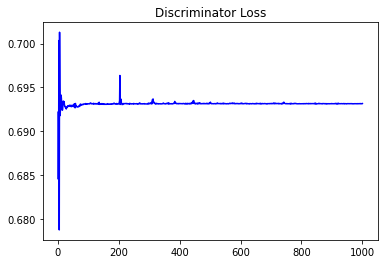

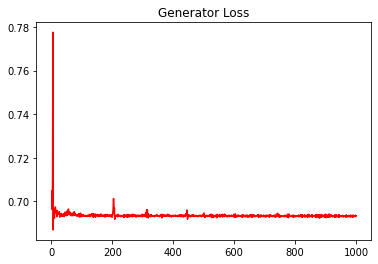

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07244722950597855


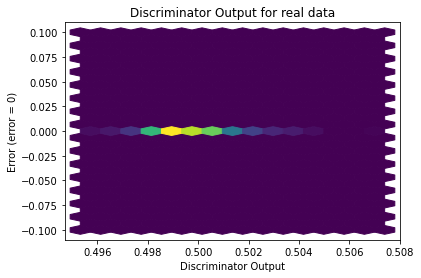

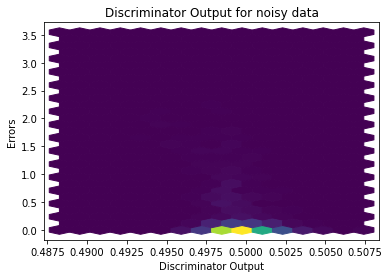

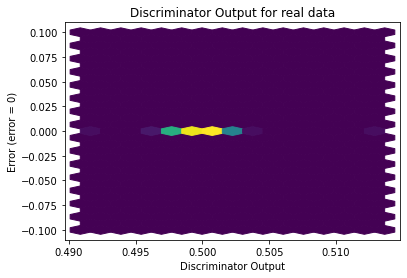

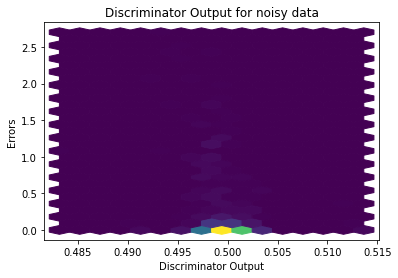

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


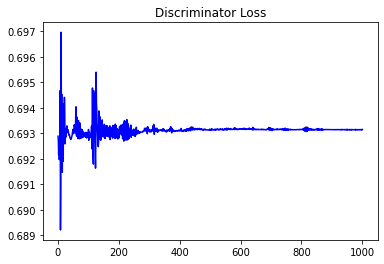

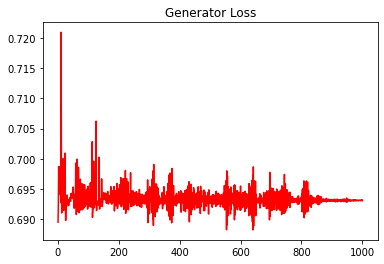

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08265248512541243


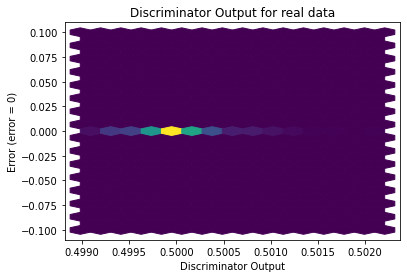

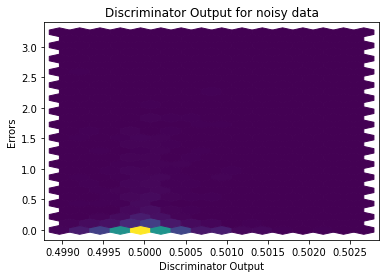

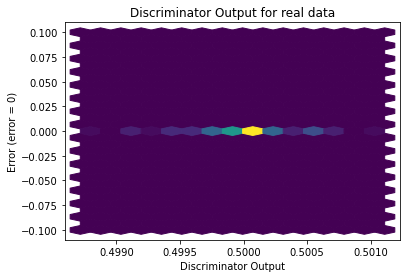

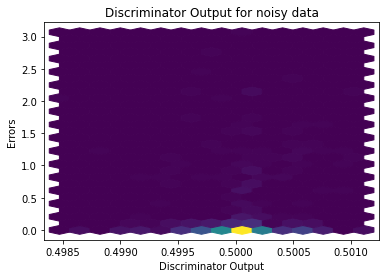

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1184]], requires_grad=True)
